In [2]:
# %%
# Cell 1：載入套件並讀取資料
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 設定全局字體
plt.rcParams['font.family'] = 'DejaVu Sans'  # 使用微軟正黑體

# 讀取 CSV 
df = pd.read_csv('VerbalFluencyTest_rawdata.csv')

# 確認前幾筆
df.head()

,受試者編號,年齡,性別,分析結果,詞彙流暢度,詞彙豐富度,說話速度,正確率,聲音流暢度
0,1,63,2,Normal,0.895205,0.684282,0.854517,1.000000,0.940569
1,2,67,2,Dementia,0.563597,0.267195,0.853779,0.653680,0.442837
2,3,69,1,Dementia,0.227932,0.136541,0.317103,0.317103,0.616538
3,4,58,2,Normal,1.000000,0.683591,0.939348,1.000000,0.895420
4,5,72,2,Dementia,0.606681,0.201904,0.407563,0.541407,0.436888


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   受試者編號   1010 non-null   int64  
 1   年齡      1010 non-null   int64  
 2   性別      1010 non-null   int64  
 3   分析結果    1005 non-null   object 
 4   詞彙流暢度   1005 non-null   float64
 5   詞彙豐富度   1005 non-null   float64
 6   說話速度    1005 non-null   float64
 7   正確率     1005 non-null   float64
 8   聲音流暢度   1005 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 71.1+ KB


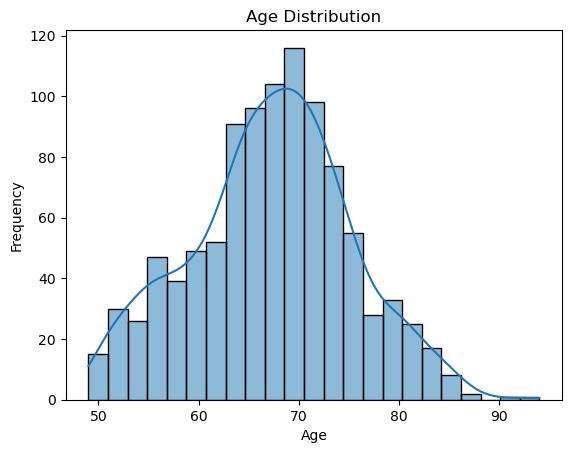

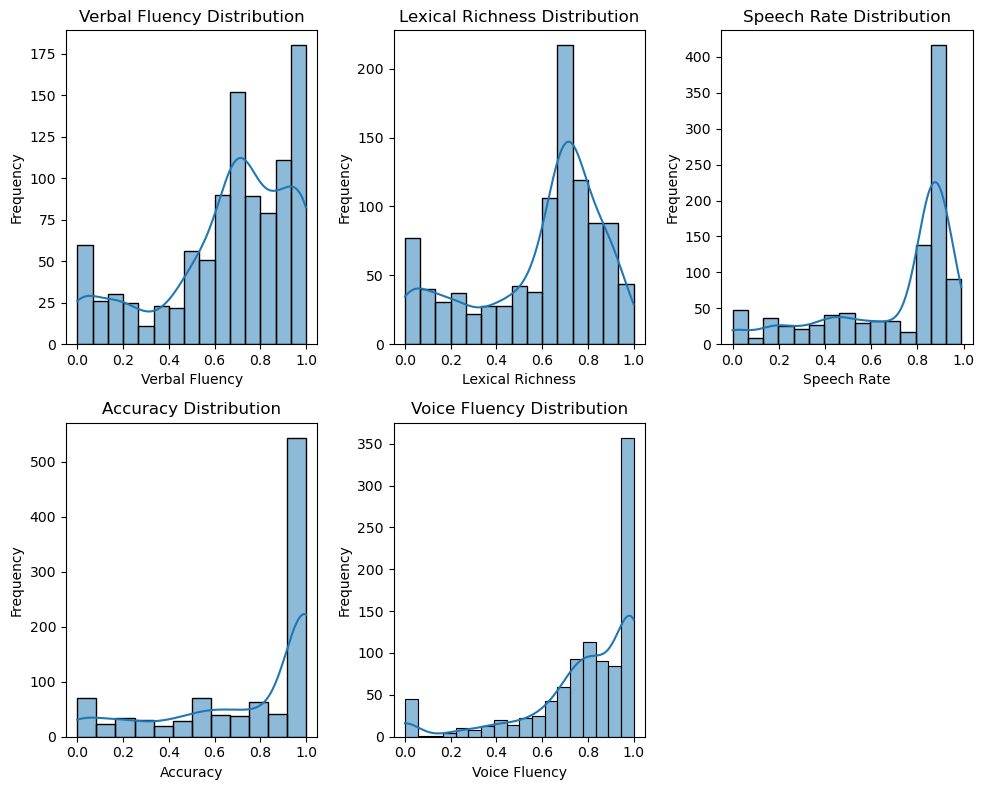

In [3]:
# %%
# 程式碼區塊 2：資料總覽與描述性統計
# 資料欄位與型態
df.info()

# 敘述性統計（數值欄位）
df.describe()

# 分類欄位（分析結果）分布
df['分析結果'].value_counts()

# 各分數欄位列表
numeric_cols = ['詞彙流暢度','詞彙豐富度','說話速度','正確率','聲音流暢度']
numeric_cols_en = ['Verbal Fluency', 'Lexical Richness', 'Speech Rate', 'Accuracy', 'Voice Fluency']

# Map Chinese column names to English for plotting
col_mapping = dict(zip(numeric_cols, numeric_cols_en))

# 年齡分布
sns.histplot(df['年齡'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 各分數分布
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col_mapping[col]} Distribution')
        axes[i].set_xlabel(col_mapping[col])
        axes[i].set_ylabel('Frequency')

# Remove empty subplot if any
if len(numeric_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [14]:
# %%
# 程式碼區塊 3：檢查遺失值與唯一值
# 各欄位缺失值統計
display(df.isnull().sum())

# 各欄位唯一值數量
display(df.nunique())


受試者編號    0
年齡       0
性別       0
分析結果     5
詞彙流暢度    5
詞彙豐富度    5
說話速度     5
正確率      5
聲音流暢度    5
dtype: int64

受試者編號    1010
年齡         41
性別          2
分析結果        3
詞彙流暢度     768
詞彙豐富度     951
說話速度      954
正確率       125
聲音流暢度     661
dtype: int64

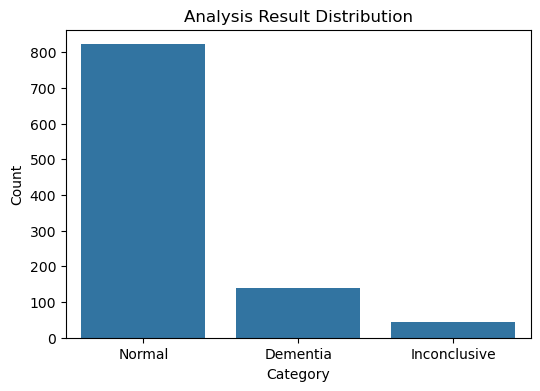

In [11]:
# %%
# 程式碼區塊 4：分析結果分類分布
plt.figure(figsize=(6,4))
sns.countplot(x='分析結果', data=df,
              order=df['分析結果'].value_counts().index)
plt.title('Analysis Result Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

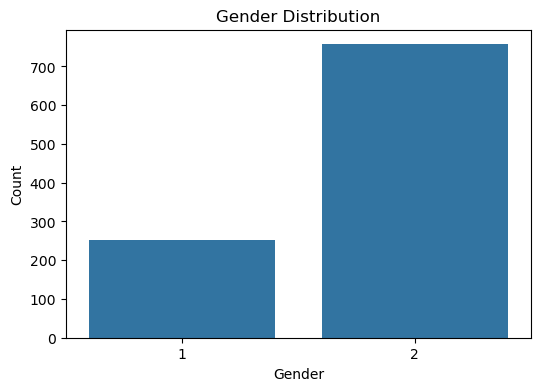

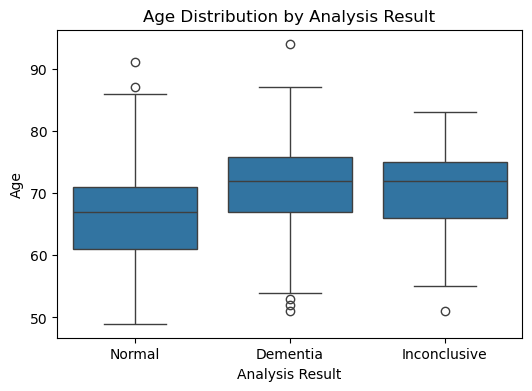

In [12]:
# %%
# 程式碼區塊 5：性別與年齡分布
# 性別分布 (1=男, 2=女)
plt.figure(figsize=(6,4))
gender_mapping = {1: 'Male', 2: 'Female'}
sns.countplot(x='性別', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
# Replace tick labels
plt.xticks([0, 1])
plt.ylabel('Count')
plt.show()

# 依分析結果檢視年齡分布
plt.figure(figsize=(6,4))
result_mapping = {'Normal': 'Normal', 'Dementia': 'Dementia'}
sns.boxplot(x='分析結果', y='年齡', data=df)
plt.title('Age Distribution by Analysis Result')
plt.xlabel('Analysis Result')
# Update xtick labels if needed
if len(df['分析結果'].unique()) == 2:
    plt.xticks([0, 1], ['Normal', 'Dementia'])
plt.ylabel('Age')
plt.show()


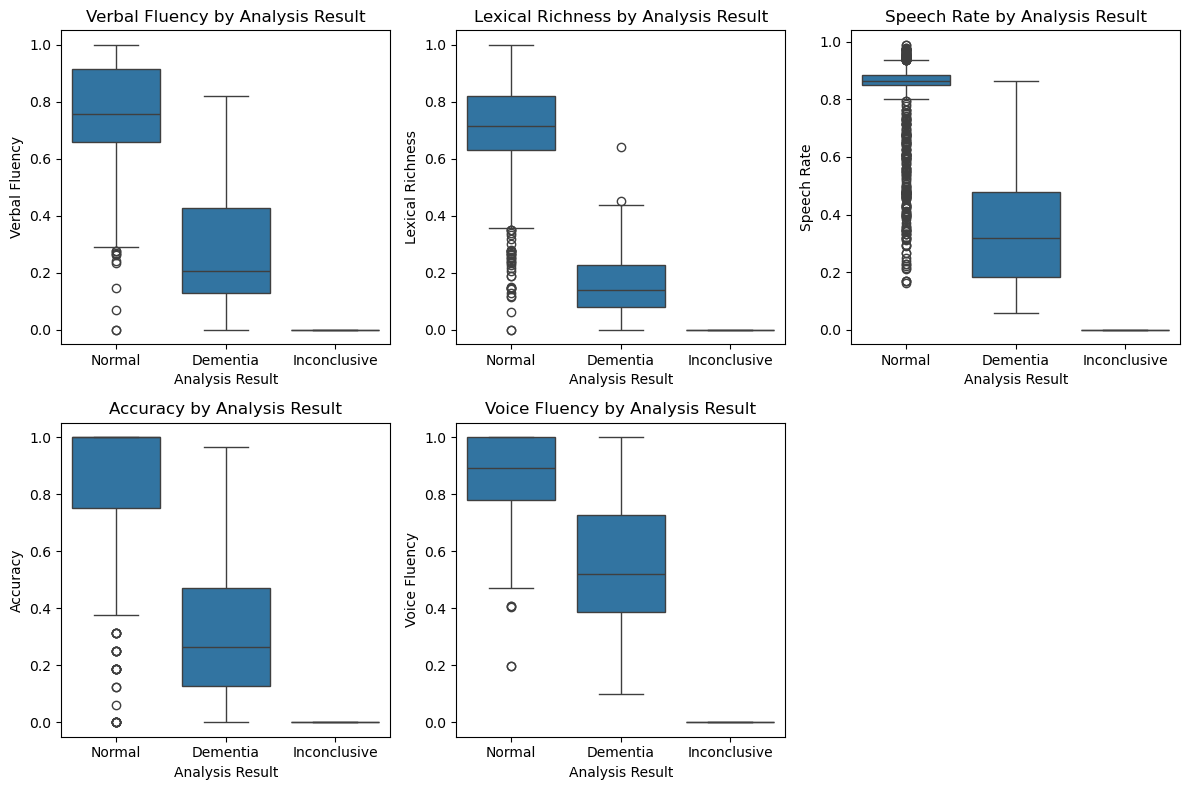

In [7]:
# %%
# 程式碼區塊 6：各分數指標箱型圖（依分析結果）
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='分析結果', y=col, data=df)
    plt.title(f'{col_mapping[col]} by Analysis Result')
    plt.xlabel('Analysis Result')
    plt.ylabel(col_mapping[col])
    # Replace x-axis labels
    if len(df['分析結果'].unique()) == 2:
        plt.xticks([0, 1], ['Normal', 'Dementia'])
plt.tight_layout()
plt.show()


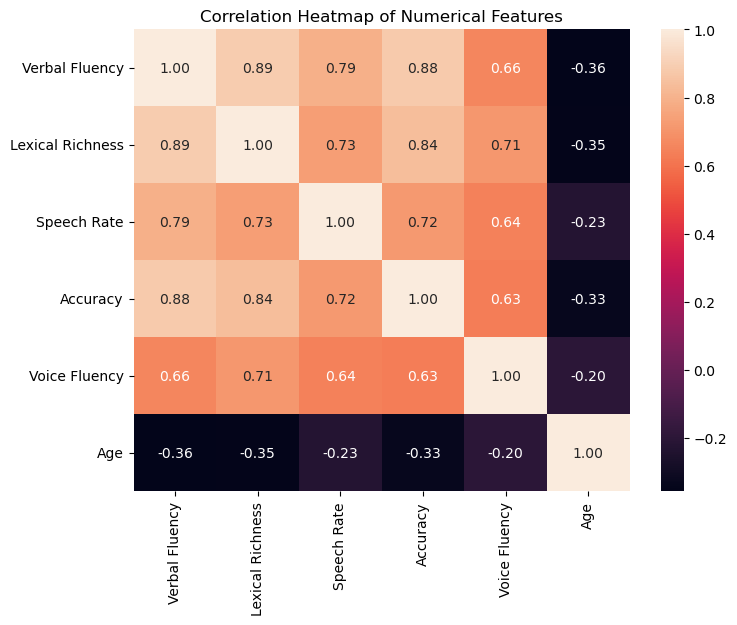

In [8]:
# %%
# 程式碼區塊 7：數值特徵相關性熱圖
plt.figure(figsize=(8,6))
corr = df[numeric_cols + ['年齡']].corr()

# Create English column labels for correlation matrix
corr_cols = numeric_cols + ['年齡']
corr_cols_en = numeric_cols_en + ['Age']
corr_index_en = corr_cols_en.copy()

# Create new correlation dataframe with English labels
corr_en = pd.DataFrame(corr.values, 
                      columns=corr_cols_en, 
                      index=corr_index_en)

sns.heatmap(corr_en, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


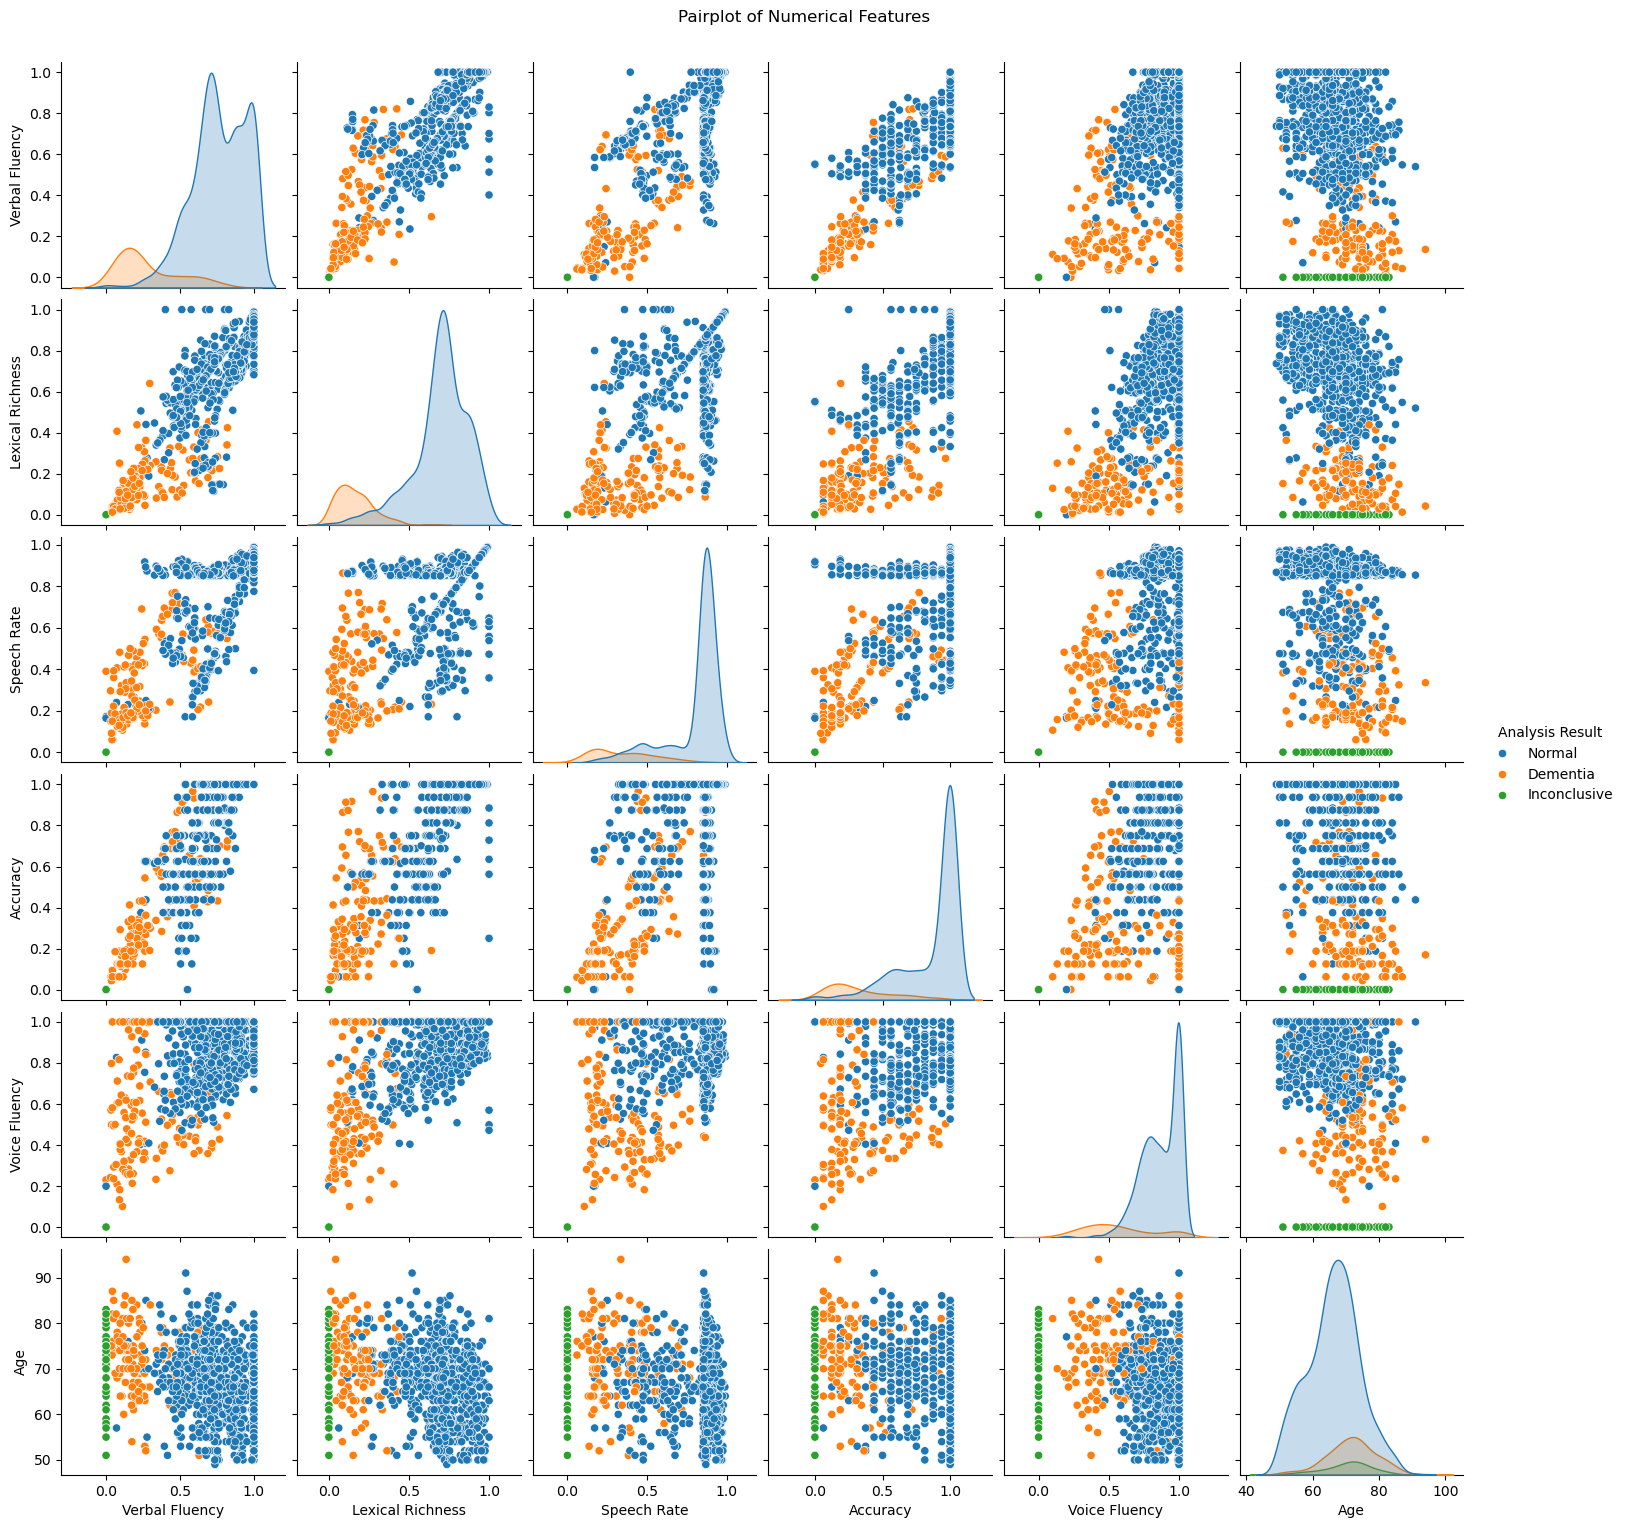

In [9]:
# %%
# 程式碼區塊 8：Pairplot（依分析結果著色）
# Create a copy of the dataframe with English column names
plot_df = df[numeric_cols + ['年齡', '分析結果']].copy()

# Rename columns to English
english_columns = {
    '詞彙流暢度': 'Verbal Fluency',
    '詞彙豐富度': 'Lexical Richness',
    '說話速度': 'Speech Rate',
    '正確率': 'Accuracy',
    '聲音流暢度': 'Voice Fluency',
    '年齡': 'Age',
    '分析結果': 'Analysis Result'
}
plot_df.rename(columns=english_columns, inplace=True)

# Create the pairplot with English labels
sns.pairplot(plot_df, hue='Analysis Result', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [13]:
# %%
# 程式碼區塊 9：各分類群組之描述統計

# Calculate mean statistics by group
group_stats = df.groupby('分析結果')[numeric_cols + ['年齡']].mean()

# Convert the index and column names to English
group_stats.index.name = 'Analysis Result'
cols_mapping = {
    '詞彙流暢度': 'Verbal Fluency',
    '詞彙豐富度': 'Lexical Richness',
    '說話速度': 'Speech Rate',
    '正確率': 'Accuracy',
    '聲音流暢度': 'Voice Fluency',
    '年齡': 'Age'
}
group_stats.columns = [cols_mapping[col] for col in group_stats.columns]

# Display the results
print("Group Statistics - Mean Values:")
display(group_stats)

# Additional statistics - standard deviations
group_std = df.groupby('分析結果')[numeric_cols + ['年齡']].std()
group_std.index.name = 'Analysis Result'
group_std.columns = [cols_mapping[col] for col in group_std.columns]

print("\nGroup Statistics - Standard Deviations:")
display(group_std)


Group Statistics - Mean Values:


,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency,Age
Analysis Result,,,,,,
Dementia,0.280476,0.161006,0.350191,0.330225,0.565985,71.731884
Inconclusive,0.000000,0.000000,0.000000,0.000000,0.000000,70.200000
Normal,0.764358,0.698010,0.802586,0.864122,0.870244,66.287105



Group Statistics - Standard Deviations:


,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency,Age
Analysis Result,,,,,,
Dementia,0.208288,0.113773,0.190961,0.240447,0.245432,7.490666
Inconclusive,0.000000,0.000000,0.000000,0.000000,0.000000,7.149698
Normal,0.183050,0.172542,0.168609,0.221278,0.134062,7.838367
